<Figure size 1296x648 with 0 Axes>

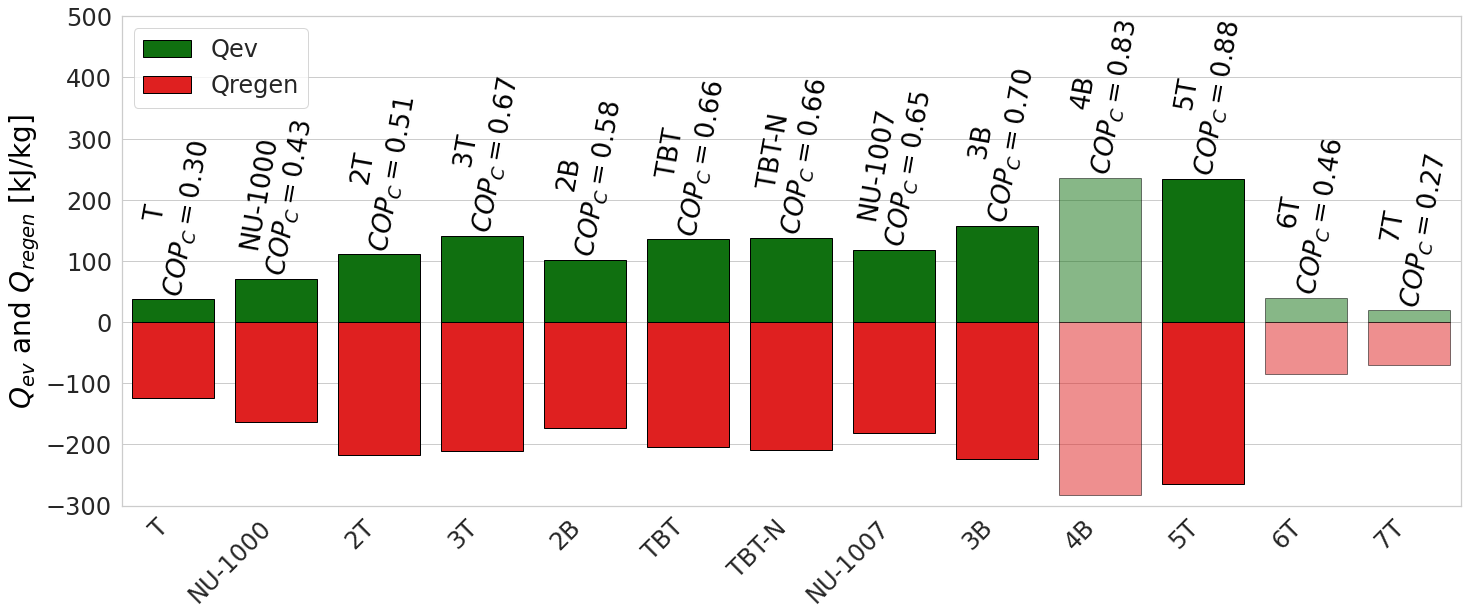

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data loading
df = pd.read_csv('Refrigiration_calc1.csv')

# Plotting
plt.figure(figsize=(18, 9))

# Define the desired order of categories
desired_order = ['T', 'NU-1000', '2T', '3T', '2B', 'TBT', 'TBT-N', 'NU-1007', '3B', '4B', '5T', '6T', '7T']

# Reorder the 'name' column based on the desired order
df['name'] = pd.Categorical(df['name'], categories=desired_order, ordered=True)

# Sort the DataFrame based on the new ordering
df = df.sort_values('name')

# Set the style for the plot (optional, for a scientific publication look)
sns.set(style="whitegrid", font_scale=1.2)

# Create a new figure with the same size as the example
fig, ax = plt.subplots(figsize=(24, 9))

# Create a barplot using Seaborn for Qev and Qregen
barplot_qev = sns.barplot(x=df['name'], y=df['Qev'], color='green', label='Qev', ax=ax,)
barplot_qregen = sns.barplot(x=df['name'], y=-df['Qregen'], color='red', label='Qregen', ax=ax)

# Set black borders for each column
for patch in barplot_qev.patches:
    patch.set_edgecolor('black')

for patch in barplot_qregen.patches:
    patch.set_edgecolor('black')

# Add 'name' labels above Qev bars with deltaW and COPc
for i, (name, COPc) in enumerate(zip(df['name'], df['COPc'])):
    ax.text(i, df['Qev'].iloc[i] + 2, f"{name}\n$COP_C={COPc:.2f}$", color='black', ha='center', va='bottom', rotation=80, fontsize=26)

# Rotate x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.xticks(rotation=45, ha='right', fontsize=24)
plt.yticks(fontsize=24)

# Set plot labels and title
ax.set_xlabel('')
ax.set_ylabel('$Q_{ev}$ and $Q_{regen}$ [kJ/kg]', color='black', fontsize=28)
plt.ylim(-300.0, 500.0)

# Add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left',fontsize=24)

# Fading specific bars
fade_bars = [ '4B', '6T', '7T']
for bar in fade_bars:
    bar_index = df[df['name'] == bar].index[0]
    barplot_qev.patches[bar_index].set_alpha(0.5)  # Fading Qev bars
    
fade_bars = ['T','2T','TBT']
for bar in fade_bars:
    bar_index = -df[df['name'] == bar].index[0]
    barplot_qregen.patches[bar_index].set_alpha(0.5)  # Fading Qregen bars


# Save the plot without empty boundaries
plt.title('', fontsize='24', fontweight='bold')
plt.savefig('COOLING_Qev_Qregen_COPc_Plot_WITH_FADE_and_Arrow_06.07.2024.png', dpi=600, bbox_inches='tight')
plt.show()
